In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

rc('text', usetex=False)
sns.set_context('paper', font_scale=2.0)
sns.set_style('whitegrid')

In [139]:
colors=[
 '#E8EAF6', 
 '#C5CAE9',
 '#9FA8DA',
 '#7986CB',
 '#5C6BC0',
 '#3F51B5',
 '#3949AB',
 '#303F9F',
 '#283593',
 '#1A237E',
]

In [53]:
rename_table = {
    'GPU_1.PMC': 'CPU.PMC', 
    'GPU_1.RDMA': 'CPU.RDMA', 
    'GPU_2.PMC': 'GPU1.PMC', 
    'GPU_2.RDMA': 'GPU1.RDMA', 
    'GPU_3.PMC': 'GPU2.PMC', 
    'GPU_3.RDMA': 'GPU2.RDMA', 
    'GPU_4.PMC': 'GPU3.PMC', 
    'GPU_4.RDMA': 'GPU3.RDMA', 
    'GPU_5.PMC': 'GPU4.PMC', 
    'GPU_5.RDMA': 'GPU4.RDMA', 
}

In [119]:
bl_raw_data = pd.read_csv('traffic_dump_stencil.csv')
bl_raw_data.columns = ['src', 'dst', 'req', 'byte']
bl_raw_data['src'] = bl_raw_data['src'].str.strip()
bl_raw_data['dst'] = bl_raw_data['dst'].str.strip()
bl_raw_data = bl_raw_data.drop(columns=['req'])
bl_raw_data = bl_raw_data.replace(rename_table)
bl_raw_data

src          dst       byte
0   GPU_5.L2TLB          MMU          0
1         GPU_5       driver          0
2        driver          MMU          0
3         GPU_4       driver          0
4        driver        GPU_5          0
5        driver        GPU_3          0
6        driver        GPU_1   33849600
7        driver        GPU_2       5380
8        driver        GPU_4          0
9     GPU3.RDMA    GPU2.RDMA     163172
10    GPU3.RDMA    GPU1.RDMA     177728
11    GPU3.RDMA    GPU4.RDMA      12720
12    GPU4.RDMA    GPU1.RDMA     380688
13    GPU4.RDMA    GPU3.RDMA      80560
14     GPU1.PMC      CPU.PMC          0
15      CPU.PMC     GPU1.PMC   24424448
16      CPU.PMC     GPU3.PMC    2056192
17      CPU.PMC     GPU4.PMC     778240
18      CPU.PMC     GPU2.PMC    1966080
19     GPU4.PMC      CPU.PMC          0
20     GPU2.PMC      CPU.PMC          0
21        GPU_3       driver          0
22        GPU_1       driver   33849600
23  GPU_3.L2TLB          MMU          0
24          MMU  GPU_2.L2TLB          0
25          MMU  GPU_3.L2TLB          0
26          MMU  GPU_4.L2TLB          0
27          MMU  GPU_5.L2TLB          0
28          MMU       driver          0
29    GPU1.RDMA    GPU2.RDMA     908200
30    GPU1.RDMA    GPU3.RDMA    1023204
31    GPU1.RDMA    GPU4.RDMA    1189020
32     GPU3.PMC      CPU.PMC          0
33        GPU_2       driver       5316
34  GPU_2.L2TLB          MMU          0
35  GPU_4.L2TLB          MMU          0
36    GPU2.RDMA    GPU1.RDMA     143664
37    GPU2.RDMA    GPU3.RDMA      25764
38          all          all  101039576

In [118]:
gf_raw_data = pd.read_csv('traffic_dump_stencil_griff.csv')
gf_raw_data.columns = ['src', 'dst', 'req', 'byte']
gf_raw_data['src'] = gf_raw_data['src'].str.strip()
gf_raw_data['dst'] = gf_raw_data['dst'].str.strip()
gf_raw_data = gf_raw_data.drop(columns=['req'])
gf_raw_data['src'] = gf_raw_data['src'].replace(rename_table)
gf_raw_data['dst'] = gf_raw_data['dst'].replace(rename_table)
gf_raw_data

src          dst      byte
0     GPU4.RDMA    GPU1.RDMA     53488
1     GPU4.RDMA     CPU.RDMA    218516
2     GPU4.RDMA    GPU3.RDMA    132516
3      GPU1.PMC      CPU.PMC         0
4      GPU4.PMC      CPU.PMC         0
5         GPU_1       driver  33849600
6         GPU_2       driver      5316
7   GPU_2.L2TLB          MMU         0
8         GPU_3       driver         0
9         GPU_5       driver         0
10       driver        GPU_1  33849600
11       driver        GPU_2      5380
12       driver        GPU_3         0
13       driver        GPU_4         0
14       driver        GPU_5         0
15  GPU_5.L2TLB          MMU         0
16          MMU       driver         0
17    GPU1.RDMA    GPU3.RDMA     46948
18    GPU1.RDMA    GPU4.RDMA    225648
19    GPU1.RDMA     CPU.RDMA    358040
20    GPU1.RDMA    GPU2.RDMA     99704
21       driver          MMU         0
22     GPU2.PMC      CPU.PMC         0
23     GPU3.PMC      CPU.PMC         0
24        GPU_4       driver         0
25  GPU_3.L2TLB          MMU         0
26    GPU2.RDMA    GPU3.RDMA     38536
27    GPU2.RDMA    GPU1.RDMA    284152
28    GPU2.RDMA     CPU.RDMA    212864
29    GPU3.RDMA    GPU1.RDMA      9636
30    GPU3.RDMA     CPU.RDMA    223452
31    GPU3.RDMA    GPU4.RDMA     28260
32    GPU3.RDMA    GPU2.RDMA    209800
33     CPU.RDMA    GPU1.RDMA   1209240
34     CPU.RDMA    GPU2.RDMA   1282432
35     CPU.RDMA    GPU3.RDMA   1387036
36     CPU.RDMA    GPU4.RDMA   1256276
37  GPU_4.L2TLB          MMU         0
38          MMU  GPU_2.L2TLB         0
39          MMU  GPU_3.L2TLB         0
40          MMU  GPU_4.L2TLB         0
41          MMU  GPU_5.L2TLB         0
42      CPU.PMC     GPU3.PMC   3117056
43      CPU.PMC     GPU4.PMC   3121152
44      CPU.PMC     GPU1.PMC   3100672
45      CPU.PMC     GPU2.PMC   3117056
46          all          all  87442376

In [120]:
all_nodes = pd.concat([
    bl_raw_data['src'], 
    bl_raw_data['dst'],
    gf_raw_data['src'],
    gf_raw_data['dst'],])
all_nodes = all_nodes[all_nodes.str.contains('PMC') | all_nodes.str.contains('RDMA')]
all_nodes = all_nodes.str.strip().unique()
all_nodes

array(['GPU3.RDMA', 'GPU4.RDMA', 'GPU1.PMC', 'CPU.PMC', 'GPU4.PMC',
       'GPU2.PMC', 'GPU1.RDMA', 'GPU3.PMC', 'GPU2.RDMA', 'CPU.RDMA'],
      dtype=object)

In [121]:
bl_filtered_data = bl_raw_data[bl_raw_data['src'].isin(all_nodes) & bl_raw_data['dst'].isin(all_nodes)]
bl_filtered_data

src        dst      byte
9   GPU3.RDMA  GPU2.RDMA    163172
10  GPU3.RDMA  GPU1.RDMA    177728
11  GPU3.RDMA  GPU4.RDMA     12720
12  GPU4.RDMA  GPU1.RDMA    380688
13  GPU4.RDMA  GPU3.RDMA     80560
14   GPU1.PMC    CPU.PMC         0
15    CPU.PMC   GPU1.PMC  24424448
16    CPU.PMC   GPU3.PMC   2056192
17    CPU.PMC   GPU4.PMC    778240
18    CPU.PMC   GPU2.PMC   1966080
19   GPU4.PMC    CPU.PMC         0
20   GPU2.PMC    CPU.PMC         0
29  GPU1.RDMA  GPU2.RDMA    908200
30  GPU1.RDMA  GPU3.RDMA   1023204
31  GPU1.RDMA  GPU4.RDMA   1189020
32   GPU3.PMC    CPU.PMC         0
36  GPU2.RDMA  GPU1.RDMA    143664
37  GPU2.RDMA  GPU3.RDMA     25764

In [99]:
bl_filtered_pmc_data = bl_filtered_data[bl_filtered_data['src'].str.contains('PMC') & bl_filtered_data['dst'].str.contains('PMC')]
bl_filtered_pmc_data
bl_plot_pmc_data = bl_filtered_pmc_data
bl_plot_pmc_data = bl_plot_pmc_data.pivot(index='src', columns='dst', values='byte')
bl_plot_pmc_data = bl_plot_pmc_data.sort_index()
bl_plot_pmc_data

dst        GPU_1.PMC   GPU_2.PMC   GPU_3.PMC   GPU_4.PMC   GPU_5.PMC
src                                                                 
CPU.PMC          NaN  24424448.0   1966080.0   2056192.0    778240.0
GPU1.PMC         0.0         NaN         NaN         NaN         NaN
GPU2.PMC         0.0         NaN         NaN         NaN         NaN
GPU3.PMC         0.0         NaN         NaN         NaN         NaN
GPU4.PMC         0.0         NaN         NaN         NaN         NaN

In [100]:
bl_filtered_rdma_data = bl_filtered_data[bl_filtered_data['src'].str.contains('RDMA') & bl_filtered_data['src'].str.contains('RDMA')]
bl_filtered_rdma_data
bl_plot_rdma_data = bl_filtered_rdma_data
bl_plot_rdma_data = bl_plot_rdma_data.pivot(index='src', columns='dst', values='byte')
bl_plot_rdma_data = bl_plot_rdma_data.sort_index()
bl_plot_rdma_data

dst         GPU_2.RDMA   GPU_3.RDMA   GPU_4.RDMA   GPU_5.RDMA
src                                                          
GPU1.RDMA          NaN     908200.0    1023204.0    1189020.0
GPU2.RDMA     143664.0          NaN      25764.0          NaN
GPU3.RDMA     177728.0     163172.0          NaN      12720.0
GPU4.RDMA     380688.0          NaN      80560.0          NaN

In [122]:
gf_filtered_data = gf_raw_data[gf_raw_data['src'].isin(all_nodes) & gf_raw_data['dst'].isin(all_nodes)]
gf_filtered_data

src        dst     byte
0   GPU4.RDMA  GPU1.RDMA    53488
1   GPU4.RDMA   CPU.RDMA   218516
2   GPU4.RDMA  GPU3.RDMA   132516
3    GPU1.PMC    CPU.PMC        0
4    GPU4.PMC    CPU.PMC        0
17  GPU1.RDMA  GPU3.RDMA    46948
18  GPU1.RDMA  GPU4.RDMA   225648
19  GPU1.RDMA   CPU.RDMA   358040
20  GPU1.RDMA  GPU2.RDMA    99704
22   GPU2.PMC    CPU.PMC        0
23   GPU3.PMC    CPU.PMC        0
26  GPU2.RDMA  GPU3.RDMA    38536
27  GPU2.RDMA  GPU1.RDMA   284152
28  GPU2.RDMA   CPU.RDMA   212864
29  GPU3.RDMA  GPU1.RDMA     9636
30  GPU3.RDMA   CPU.RDMA   223452
31  GPU3.RDMA  GPU4.RDMA    28260
32  GPU3.RDMA  GPU2.RDMA   209800
33   CPU.RDMA  GPU1.RDMA  1209240
34   CPU.RDMA  GPU2.RDMA  1282432
35   CPU.RDMA  GPU3.RDMA  1387036
36   CPU.RDMA  GPU4.RDMA  1256276
42    CPU.PMC   GPU3.PMC  3117056
43    CPU.PMC   GPU4.PMC  3121152
44    CPU.PMC   GPU1.PMC  3100672
45    CPU.PMC   GPU2.PMC  3117056

In [123]:
gf_filtered_pmc_data = gf_filtered_data[gf_filtered_data['src'].str.contains('PMC') & gf_filtered_data['dst'].str.contains('PMC')]
gf_filtered_pmc_data
gf_plot_pmc_data = gf_filtered_pmc_data
gf_plot_pmc_data = gf_plot_pmc_data.pivot(index='src', columns='dst', values='byte')
gf_plot_pmc_data = gf_plot_pmc_data.sort_index()
gf_plot_pmc_data

dst       CPU.PMC   GPU1.PMC   GPU2.PMC   GPU3.PMC   GPU4.PMC
src                                                          
CPU.PMC       NaN  3100672.0  3117056.0  3117056.0  3121152.0
GPU1.PMC      0.0        NaN        NaN        NaN        NaN
GPU2.PMC      0.0        NaN        NaN        NaN        NaN
GPU3.PMC      0.0        NaN        NaN        NaN        NaN
GPU4.PMC      0.0        NaN        NaN        NaN        NaN

In [124]:
gf_filtered_rdma_data = gf_filtered_data[gf_filtered_data['src'].str.contains('RDMA') & gf_filtered_data['src'].str.contains('RDMA')]
gf_filtered_rdma_data
gf_plot_rdma_data = gf_filtered_rdma_data
gf_plot_rdma_data = gf_plot_rdma_data.pivot(index='src', columns='dst', values='byte')
gf_plot_rdma_data = gf_plot_rdma_data.sort_index()
gf_plot_rdma_data

dst        CPU.RDMA  GPU1.RDMA  GPU2.RDMA  GPU3.RDMA  GPU4.RDMA
src                                                            
CPU.RDMA        NaN  1209240.0  1282432.0  1387036.0  1256276.0
GPU1.RDMA  358040.0        NaN    99704.0    46948.0   225648.0
GPU2.RDMA  212864.0   284152.0        NaN    38536.0        NaN
GPU3.RDMA  223452.0     9636.0   209800.0        NaN    28260.0
GPU4.RDMA  218516.0    53488.0        NaN   132516.0        NaN

Text(0.5, 26.700000000000045, 'Page Migration')

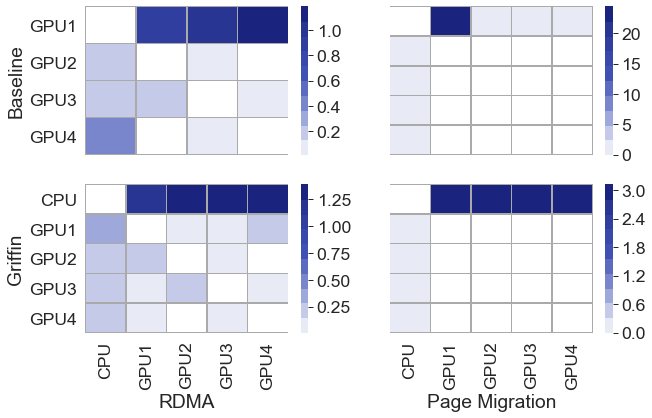

In [159]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
linecolor='#aaaaaa'
sns.heatmap(bl_plot_rdma_data / 1e6, ax=axes[0,0], cmap=colors, linecolor=linecolor, linewidths=0.5)
sns.heatmap(bl_plot_pmc_data / 1e6, ax=axes[0,1], cmap=colors, linecolor=linecolor, linewidths=0.5)
sns.heatmap(gf_plot_rdma_data / 1e6, ax=axes[1,0], cmap=colors, linecolor=linecolor, linewidths=0.5)
sns.heatmap(gf_plot_pmc_data / 1e6, ax=axes[1,1], cmap=colors, linecolor=linecolor, linewidths=0.5)

axes[0,0].set_xticks([])
axes[0,1].set_xticks([])
axes[0,1].set_yticks([])
axes[1,1].set_yticks([])
axes[0,0].set_yticklabels(['GPU1','GPU2','GPU3','GPU4'])
axes[1,0].set_yticklabels(['CPU', 'GPU1','GPU2','GPU3','GPU4'])
axes[1,0].set_xticklabels(['CPU', 'GPU1','GPU2','GPU3','GPU4'])
axes[1,1].set_xticklabels(['CPU', 'GPU1','GPU2','GPU3','GPU4'])
axes[0,0].set_ylabel('Baseline')
axes[0,0].set_xlabel('')
axes[0,1].set_ylabel('')
axes[0,1].set_xlabel('')
axes[1,0].set_ylabel('Griffin')
axes[1,0].set_xlabel('RDMA')
axes[1,1].set_ylabel('')
axes[1,1].set_xlabel('Page Migration')